**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [3]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-Prediction-Xintong/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Xintong1122/stats201-Prediction-Xintong/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [4]:
R_train.isna().sum()

volume              0
volume_past_ma10    1
dtype: int64

In [5]:
R_train=R_train.dropna()

In [6]:
R_test.isna().sum()

volume              0
volume_past_ma10    0
dtype: int64

In [7]:
R_train.head()

,volume,volume_past_ma10
1,51607.71011,37151.16694
2,50451.02149,44379.43853
3,47528.84666,46403.29951
4,42856.18295,46684.68630
5,37157.17068,45918.98563


In [8]:
R_test.head()

,volume,volume_past_ma10
244,7444.189746,9297.899680
245,6805.868558,9064.278126
246,6781.525140,8883.842121
247,8161.302885,8482.016224
248,7482.808922,8511.305678


# Machine Learning Regression

## important global packages

In [9]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [10]:
R_train.head()

,volume,volume_past_ma10
1,51607.71011,37151.16694
2,50451.02149,44379.43853
3,47528.84666,46403.29951
4,42856.18295,46684.68630
5,37157.17068,45918.98563


In [11]:
X_train = pd.DataFrame(R_train['volume_past_ma10'])
y_train = pd.DataFrame(R_train['volume'])

In [12]:
R_test.head()

,volume,volume_past_ma10
244,7444.189746,9297.899680
245,6805.868558,9064.278126
246,6781.525140,8883.842121
247,8161.302885,8482.016224
248,7482.808922,8511.305678


In [13]:
X_test = pd.DataFrame(R_test['volume_past_ma10'])
y_test = pd.DataFrame(R_test['volume'])

## Linear Regression

In [14]:
from sklearn import linear_model

In [15]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [16]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -1.0142126741034114


In [17]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['volume'])
y_pred

,volume
0,10608.393464
1,10398.790582
2,10236.905235
3,9876.391128
4,9902.669329
...,...
116,8715.037731
117,8872.294916
118,9244.054352
119,9512.434927


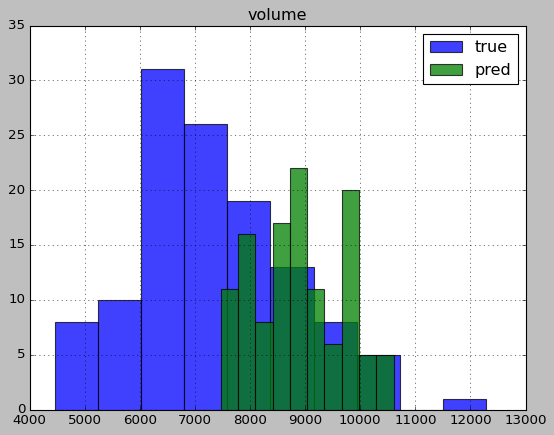

In [18]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-20-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [21]:
# calculate R2
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -3.9508086707699226


In [23]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['volume'])
y_pred

,volume
0,8158.386823
1,11573.859350
2,9421.404023
3,10244.230101
4,10244.230101
...,...
116,10244.230101
117,10244.230101
118,10244.230101
119,10244.230101


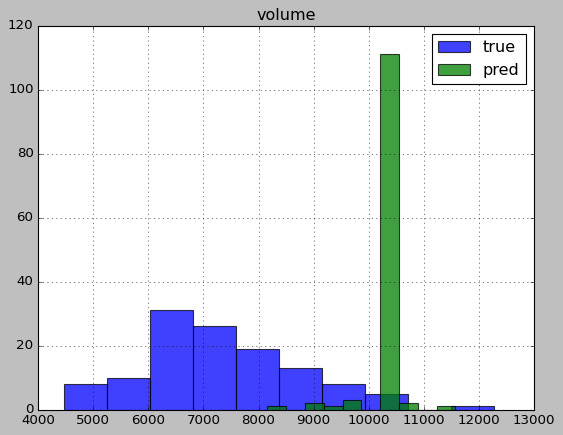

In [24]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [25]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 186.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [26]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [27]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [28]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [29]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    243
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (166862.1147, 7289.77472, 28606.96416, 19564.85135)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12221.55 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferr

In [30]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [31]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-1467.876307,-1467.876307,-2.154661e+06,-1186.150269,-1054.482304,-0.013897,-13183.815962,0.028854,0.035863,0.515319,0.028854,0.035863,0.515319,1,True,9
1,NeuralNetFastAI,-1994.447376,-1994.447376,-3.977820e+06,-1537.553029,-1302.774596,-0.871802,-8209.144611,0.028919,0.022226,12.177710,0.028919,0.022226,12.177710,1,True,8
2,WeightedEnsemble_L2,-2199.868336,-2199.868336,-4.839421e+06,-1742.096992,-1583.134838,-1.277237,-8201.431997,0.035891,0.027653,17.217878,0.002169,0.000935,1.647678,2,True,12
3,NeuralNetTorch,-2256.054026,-2256.054026,-5.089780e+06,-1971.349044,-2058.198765,-1.395046,-8552.803337,0.007636,0.013148,1.781689,0.007636,0.013148,1.781689,1,True,10
4,KNeighborsDist,-3201.138911,-3201.138911,-1.024729e+07,-2880.783795,-2985.309748,-3.821963,-10585.643868,0.003253,0.004467,0.741391,0.003253,0.004467,0.741391,1,True,2
5,KNeighborsUnif,-3207.998331,-3207.998331,-1.029125e+07,-2892.319853,-2986.354180,-3.842650,-9552.447939,0.003199,0.011143,0.786430,0.003199,0.011143,0.786430,1,True,1
6,ExtraTreesMSE,-3405.957387,-3405.957387,-1.160055e+07,-3088.759782,-3114.275062,-4.458750,-11172.767433,0.072292,0.081060,1.575836,0.072292,0.081060,1.575836,1,True,7
7,RandomForestMSE,-3421.227860,-3421.227860,-1.170480e+07,-3104.939192,-3114.275062,-4.507808,-10679.254893,0.067328,0.044866,1.430576,0.067328,0.044866,1.430576,1,True,5
8,LightGBM,-4822.568059,-4822.568059,-2.325716e+07,-4602.574863,-4731.517266,-9.943885,-8732.674906,0.002636,0.002587,1.008395,0.002636,0.002587,1.008395,1,True,4
9,CatBoost,-6248.525000,-6248.525000,-3.904406e+07,-6075.855638,-6216.922540,-17.372567,-8746.330149,0.001903,0.005869,1.256943,0.001903,0.005869,1.256943,1,True,6


In [32]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -1.27723676391919


In [33]:
y_pred = predictor.predict(X_test)
y_pred

244    8504.063477
245    8167.972168
246    7908.394531
247    7330.325684
248    7372.463379
          ...     
360    5468.149902
361    5720.310547
362    6316.402344
363    6746.743652
364    6769.509766
Name: target, Length: 121, dtype: float32

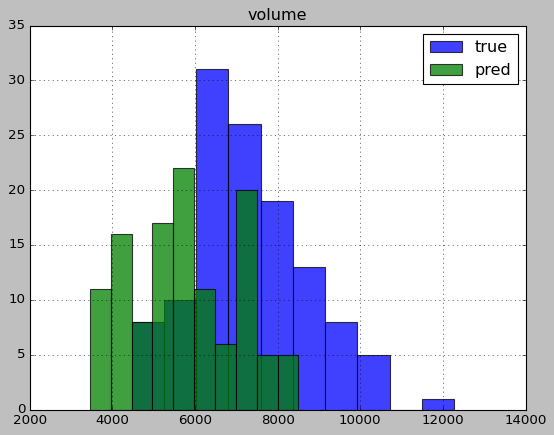

In [34]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
